In [1]:
import numpy as np
import ctypes
import matplotlib.pyplot as plt
from time import sleep
from Signal_hound_driver import Signalhound 

# Notes 


sAConfig level : when this is set the auto, the device will automatically decide the attenuation and gain to get the maximum dynamic range. The choice of this setting will depend on what is set for the reference level. To achieve best results, the reference level needs to be set or slighly above the expected input power. The reference level is in dBm units. 


The resolution bandwith represent the bandwidth of spectral energy represented in each frequency bin. For an rbw of 10 KHz, the amplitude value for each bin would represent the total energy from 5 kHz below to 5 KHz above the center bin. The maximum rbw is 250 KHZ and the minimum is 0.1 HZ. 

For spans between 201kHz and 99MHz with a start frequency above 16MHz, the RBW can be set between 30Hz and 250kHz.
For spans larger than 99MHz or sweeps that start below 16MHz, the RBW can be set between 6.5 kHz
and 250kHz.

The vbw is applied after the signal has been converted to the frequency domain as power, voltage or log units. It is implemented as a simple rectangular window , averaging the amplide readings for each frequency bin over several overlapping FFTs. A signal whose amplitude is modulated at a much higher frequency than the vbw will be shown as an average. A signal whose amplitude is modulated at lower frequency will be shown as minimum and maximum value. 




For “average power” measurements, SA_POWER_UNITS should be selected. For cleaning up an amplitude
modulated signal, SA_VOLT_UNITS would be a good choice. To emulate a traditional spectrum analyzer,
select SA_LOG_UNITS. 

# Acquire spectrum

In [2]:
#Open the device 

dll_path=r"C:\\Program Files\\Signal Hound\\Spike\\sa_api.dll"
sgh=Signalhound()
#open the device
sgh.performOpen(dll_path)

In [3]:

center_freq=4.3e9
span=1e6
ref_level=-20
rbw=0.001e6
vbw=rbw

sgh.setSweepParameters(center_freq,span)
sgh.setRefLevel(ref_level)
sgh.setGainAtten()
sgh.setSweepCoupling(rbw,vbw)
sgh.setProcUnit("dbm")
sgh.setSweepMode("sweeping")

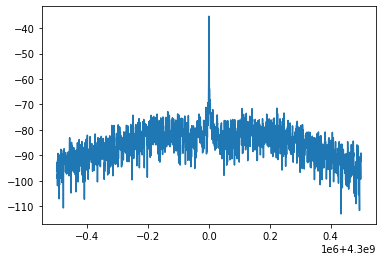

In [4]:
#acquire single 
sgh.SingleSweep()
plt.plot(sgh.freq, sgh.trace)

-35.35724220275879


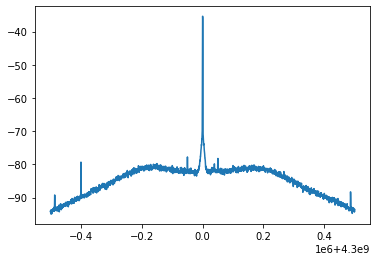

In [6]:
# acquire average
navg=100
sgh.AvSweep(navg)
plt.plot(sgh.freq,sgh.av_trace)
print(np.max(sgh.av_trace))

In [7]:
sgh.performClose()

# Acquire IQ 

In [3]:
dll_path=r"C:\\Program Files\\Signal Hound\\Spike\\sa_api.dll"
sgh=Signalhound()
#open the device
sgh.performOpen(dll_path)


In [4]:
center_freq=4.3e9+1e3
span=5e3 #does not change anything 
ref_level=-20

decimation=1
bandwidth=250e3

sgh.setSweepParameters(center_freq,span)
sgh.setRefLevel(ref_level)
sgh.setGainAtten()
sgh.setIQ(decimation,bandwidth)
sgh.setProcUnit("mV")
sgh.setSweepMode("IQ")

16.009313985705376


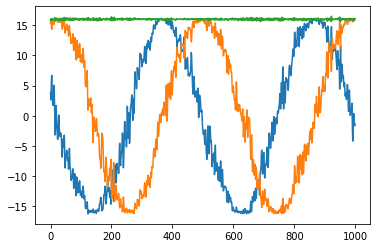

In [12]:
n_points=1000
sgh.IQ(n_points)

b=sgh.iqArr[0:].reshape(int(len(sgh.iqArr[0:])/2),2)

plt.plot(b[:,1]*1000)
plt.plot(b[:,0]*1000)
plt.plot(np.sqrt(b[:,0]**2+b[:,1]**2)*1000)

print(np.mean(np.sqrt(b[:,0]**2+b[:,1]**2))*1000)

In [13]:
sgh.performClose()

## conversion 

Assuming identical loads (50 ohm), the ratio of the voltage is converted to db by 

$$20 \log \left ( \frac{V_1}{V_2} \right ) [dB] $$ 
In terms of power, this corresponds to 

$$10 \log \left ( \frac{P_1}{P_2} \right ) [dB] $$ 

Absolute power cna also be expressed in dBm as :

$$10 \log \left ( \frac{P_1 [mW]}{1 mW} \right ) [dBm] $$ 

A power of 1 mW is equivalent to 0 dBm while a power of 1 W is equivalent to 30 dBm.


For voltage, we can work in voltage peak-to peak 
$$V_{pp}=V_{p} \cdot 2$$ 

$$V_{pp}=V_{rms} \cdot 2\sqrt{2}$$

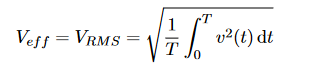

The idea behind v_rms is that a signal with a v_rms will dissipate an average power equivalent to a dc voltage when applied accross a resistance R

$$P=\frac{V_{rms}^{2}}{R} [W]$$

Therefore, with this in mind, we can simply substitute the voltage rms for the the power to get it in dbm
$$ 10 \log \left ( \frac{V_{RMS}^{2}}{R \cdot 1 mW} \right ) [dbm]$$ 

Finally, one can also use dbV units 
$$20 \log \left ( \frac{V_{rms} [V]}{1 V} \right ) [dBV] $$ 